In [2]:
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt


In [3]:

train_df = pd.read_csv('mnist_train.csv')
test_df = pd.read_csv('mnist_test.csv')


X_train = train_df.iloc[:, 1:].values
y_train = train_df.iloc[:, 0].values
X_test = test_df.iloc[:, 1:].values
y_test = test_df.iloc[:, 0].values


X_train = X_train / 255.0
X_test = X_test / 255.0


X_train = X_train.reshape(-1, 28, 28, 1)
X_test = X_test.reshape(-1, 28, 28, 1)


y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)


In [4]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((2,2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(10, activation='softmax')  
])


C:\Users\pradeep\anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [5]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [6]:
history = model.fit(X_train, y_train_cat, epochs=10, batch_size=128,
                    validation_split=0.2, verbose=1)


Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 39s 89ms/step - accuracy: 0.7714 - loss: 0.7294 - val_accuracy: 0.9757 - val_loss: 0.0817
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 40s 87ms/step - accuracy: 0.9636 - loss: 0.1209 - val_accuracy: 0.9833 - val_loss: 0.0575
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 87ms/step - accuracy: 0.9745 - loss: 0.0835 - val_accuracy: 0.9858 - val_loss: 0.0478
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 33s 88ms/step - accuracy: 0.9789 - loss: 0.0702 - val_accuracy: 0.9867 - val_loss: 0.0475
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 89ms/step - accuracy: 0.9820 - loss: 0.0555 - val_accuracy: 0.9888 - val_loss: 0.0395
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 41s 89ms/step - accuracy: 0.9860 - loss: 0.0463 - val_accuracy: 0.9898 - val_loss: 0.0368
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 34s 90ms/step - accuracy: 0.9876 - loss: 0.0394 - val_accuracy: 0.9897 - val_loss: 0.0381
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 43s 96ms/step - accuracy: 0.9872 - loss: 0.0389 - 

Test Accuracy: 99.22%
313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       980
           1       0.99      1.00      1.00      1135
           2       1.00      0.99      0.99      1032
           3       0.99      0.99      0.99      1010
           4       0.99      0.99      0.99       982
           5       0.98      0.99      0.99       892
           6       0.99      0.99      0.99       958
           7       1.00      0.99      0.99      1028
           8       0.99      0.99      0.99       974
           9       0.99      0.98      0.99      1009

    accuracy                           0.99     10000
   macro avg       0.99      0.99      0.99     10000
weighted avg       0.99      0.99      0.99     10000



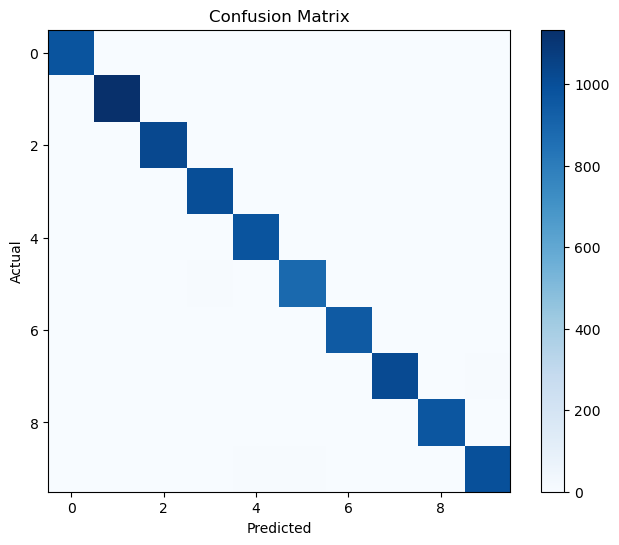

In [7]:

test_loss, test_acc = model.evaluate(X_test, y_test_cat, verbose=0)
print(f"Test Accuracy: {test_acc * 100:.2f}%")


y_pred = model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)


print(classification_report(y_test, y_pred_classes))


conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(8,6))
plt.imshow(conf_matrix, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.colorbar()
plt.show()


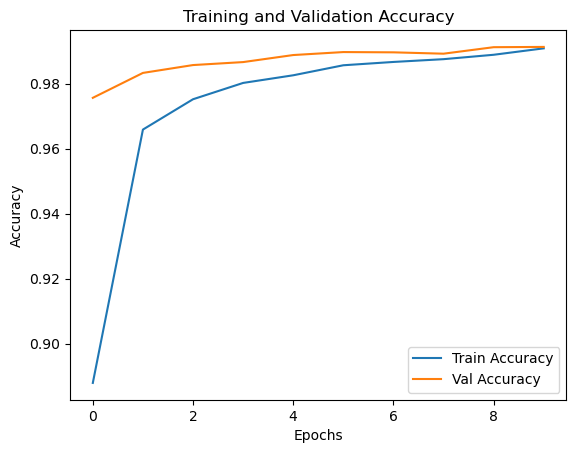

In [8]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.show()
